In [10]:
import json
import copy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from gensim.models.word2vec import Word2Vec

In [11]:
import sys
sys.path.append("../../../")

from graph_dynamics.dynamics import Macrostates
from graph_dynamics.dynamics import GenerativeDynamics
from graph_dynamics.utils import graph_paths_visualization
from graph_dynamics.dynamics import GraphsFormatsHandlers
from graph_dynamics.networks.datatypes import VanillaGraph
from graph_dynamics.networks.communities import CommunityGraph

from graph_dynamics.dynamics import datatypes
from graph_dynamics.dynamics import MacrostatesHandlers
from graph_dynamics.dynamics import Macrostates
from graph_dynamics.utils import gd_files_handler
from graph_dynamics.embeddings import alignment
from graph_dynamics.dynamics import GenerativeDynamicsCommunities
from graph_dynamics.networks import communities
from graph_dynamics.embeddings import node2vec

In [12]:
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import procrustes

In [13]:
Macrostates.macrostate_function_dictionary.keys()

['advanced_stats',
 'pagerank',
 'deepwalk_online',
 'new_nodes',
 'basic_stats',
 'degree_nodes',
 'node2vec_macrostates',
 'bigclam',
 'node2vec_online_macrostates',
 'degree_centrality']

In [14]:
simulations_directory = "/home/cesar/Desktop/GraphsDynamics/Simulations/"
dynamics_identifier = "Communities"
gd_directory = simulations_directory + dynamics_identifier + "_gd/"
number_of_steps = 30

In [21]:
ALL_TIME_INDEXES,DYNAMICS_PARAMETERS,macroNumbers = gd_files_handler.gd_folder_stats(gd_directory,True)

Dynamics Communities
{u'DynamicsClassParameters': {u'CommunitiesForestFire': {u'0': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                                                                u'OrphanPrb': 0.0,
                                                                u'StartNNodes': 1,
                                                                u'Take2AmbasPrb': 0.0},
                                                         u'1': {u'BackBurnProb': 0.32,
                                                                u'BurnExpFireP': False,
                                                                u'DecayProb': 1.0,
                                                                u'ForwBurnProb': 0.2,
                                     

# Take The Communities

In [28]:
graph_object = datatypes.get_graph_from_dynamics(gd_directory,0)
#graph_object.get_graph_state()["communities"]

In [26]:
new_nodes = MacrostatesHandlers.time_index_macro(gd_directory,
                                                 "new_nodes",
                                                 "newnodes",
                                                 1)
new_nodes['new_nodes']

# READ ALL ALIGNEMENTS

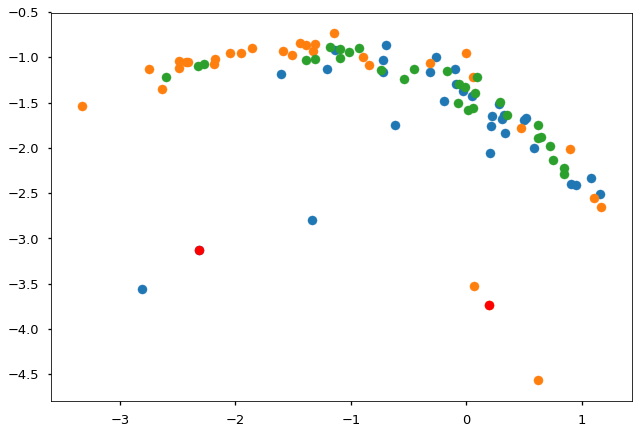

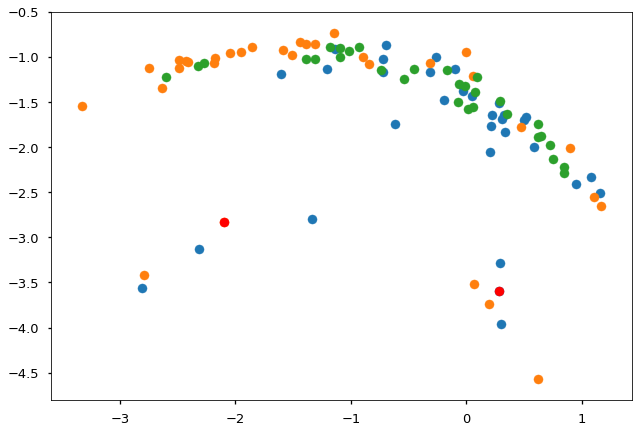

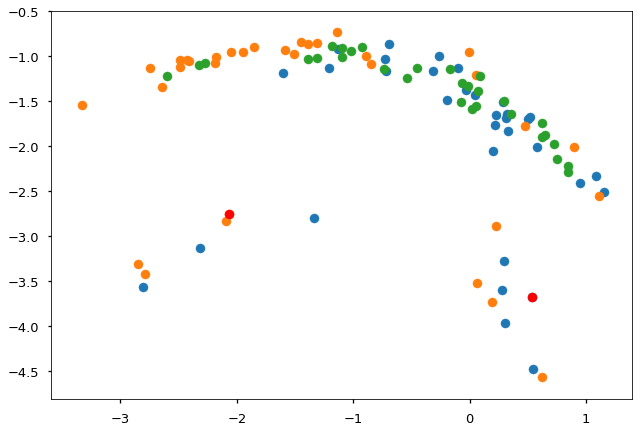

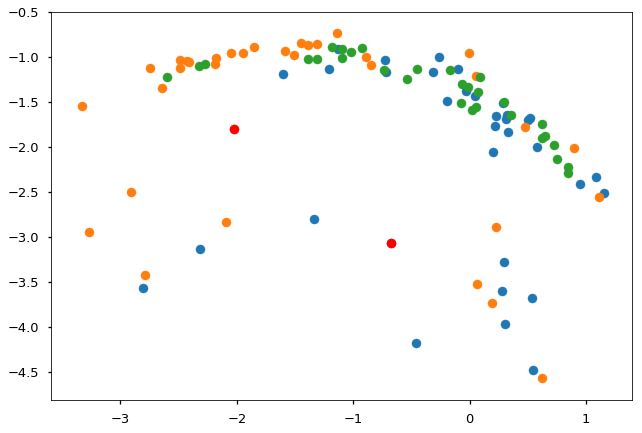

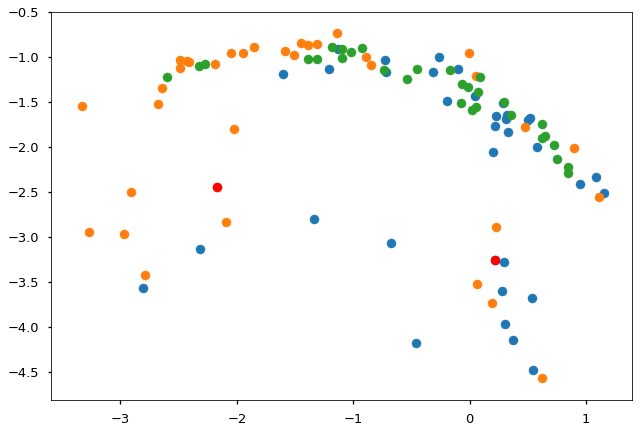

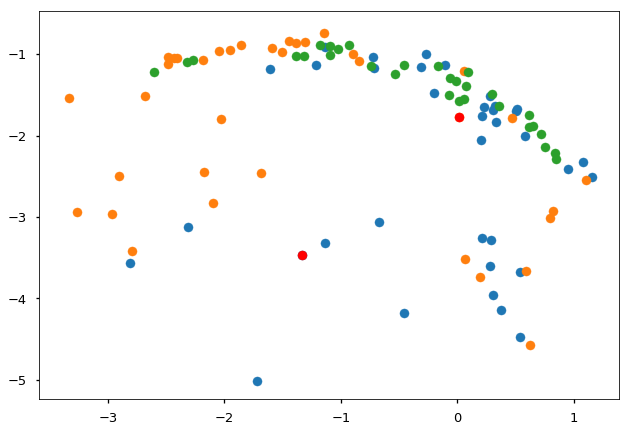

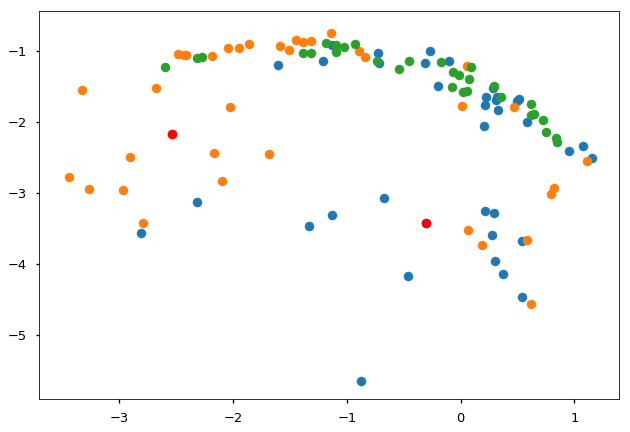

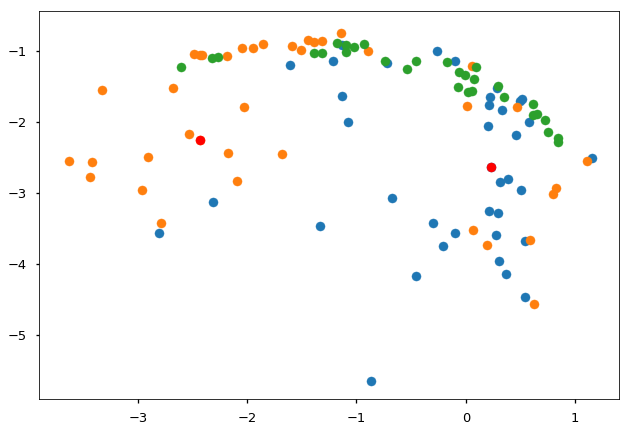

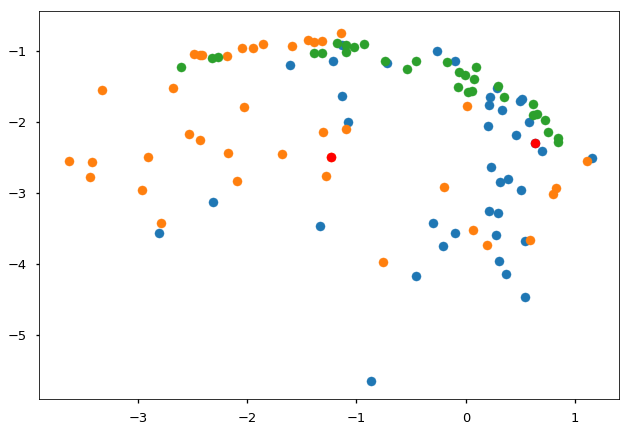

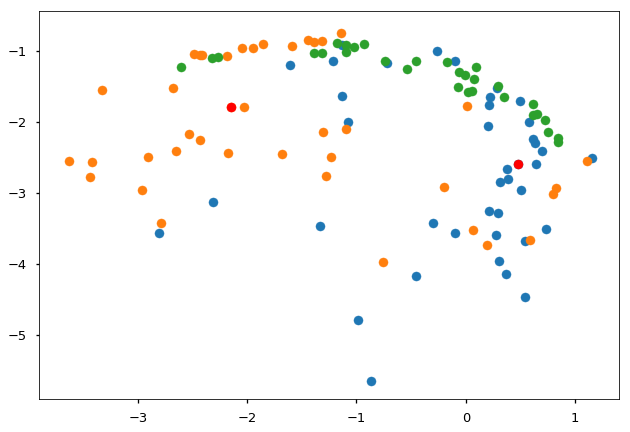

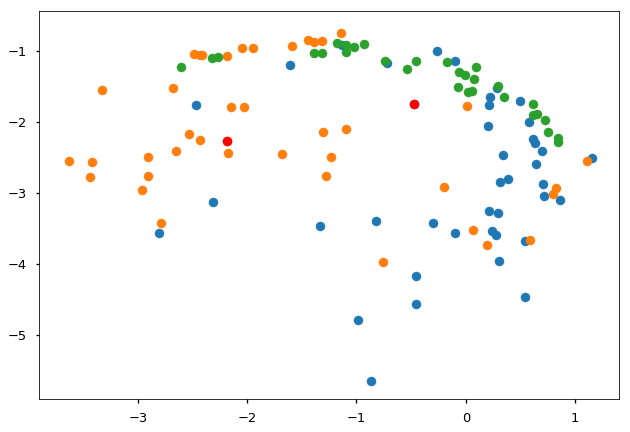

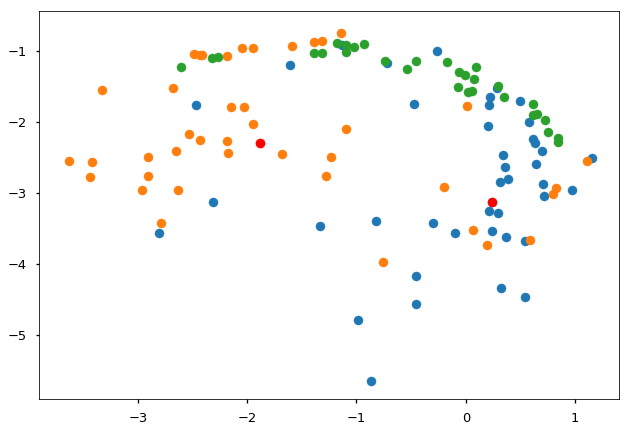

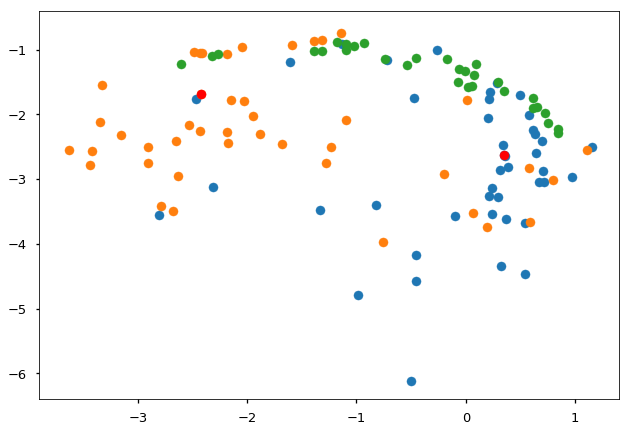

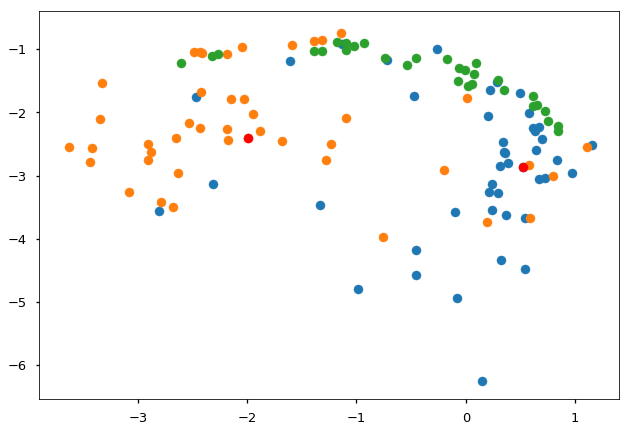

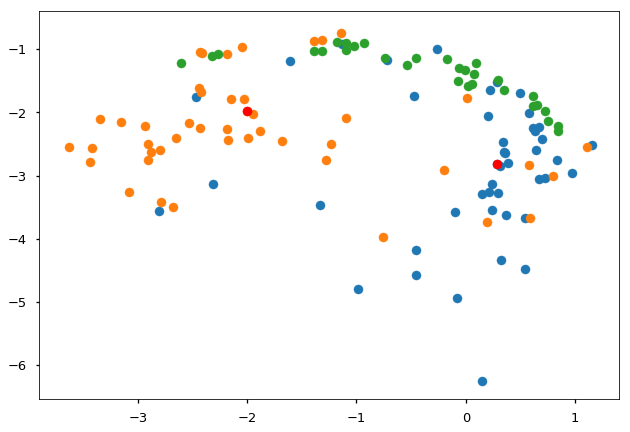

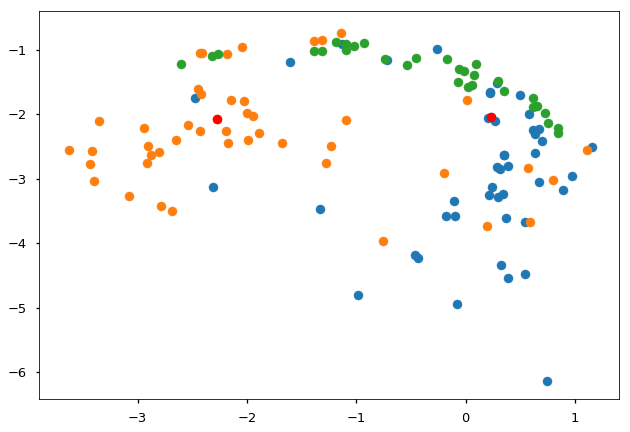

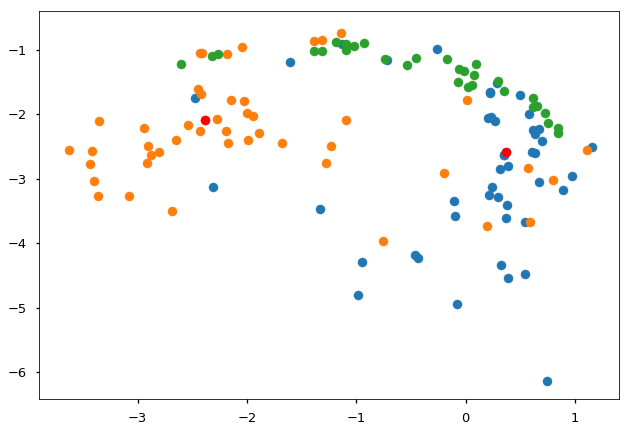

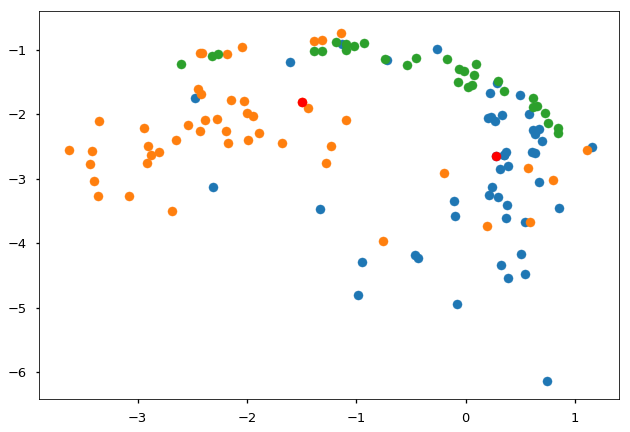

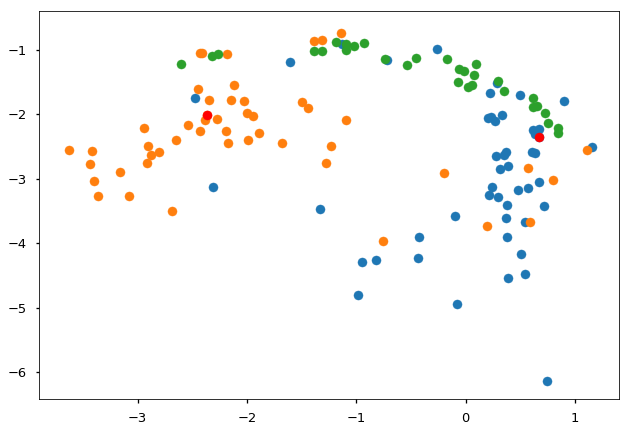

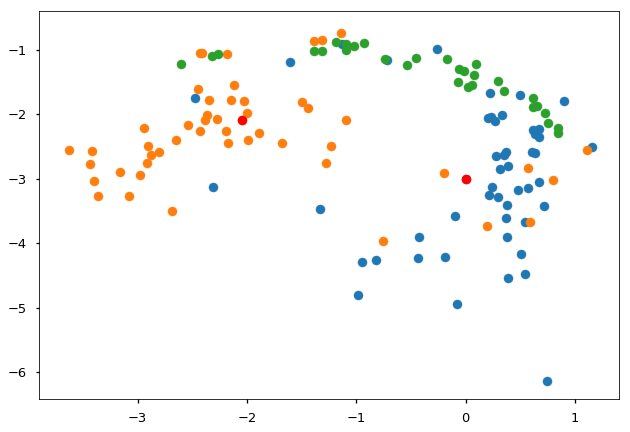

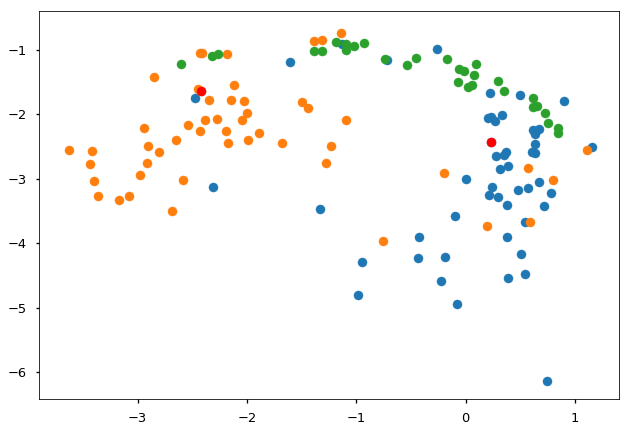

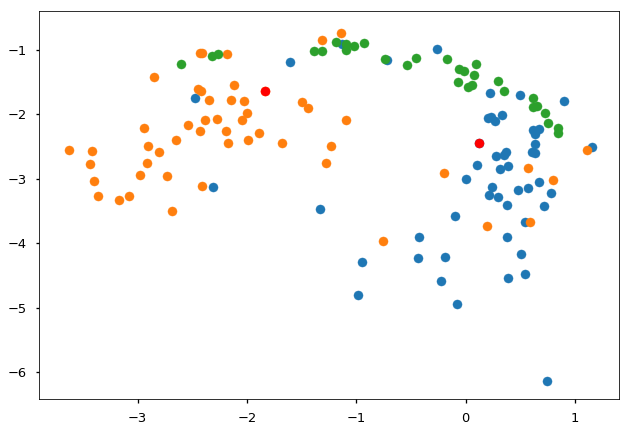

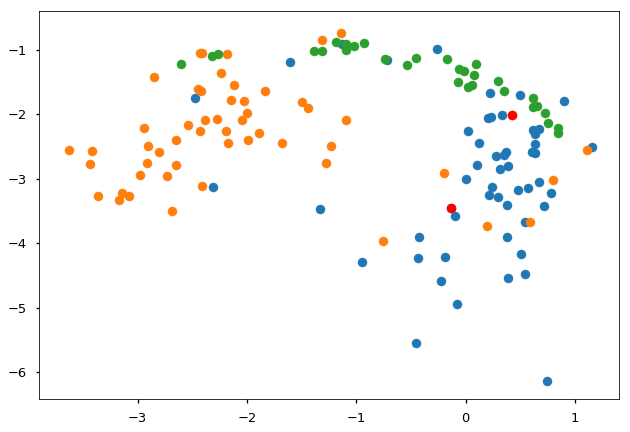

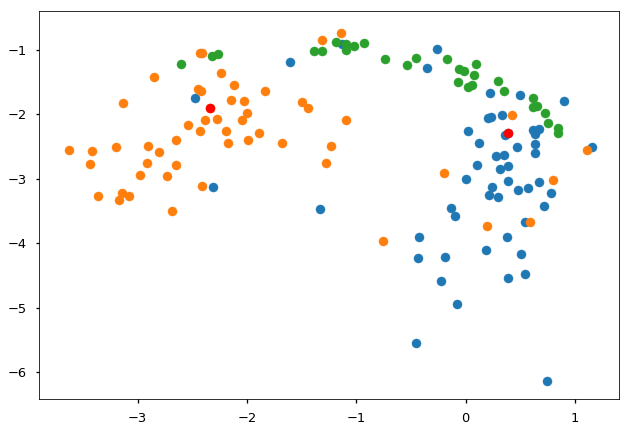

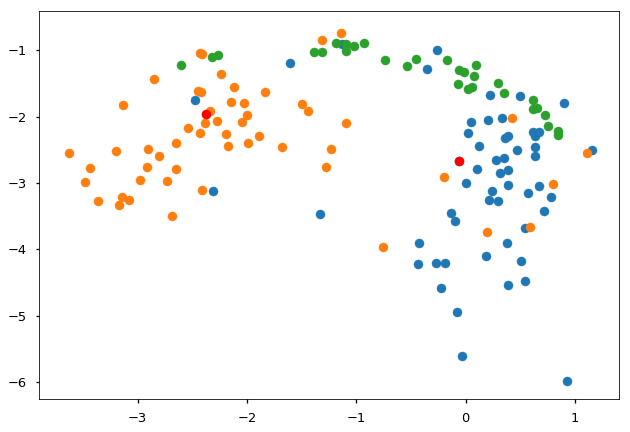

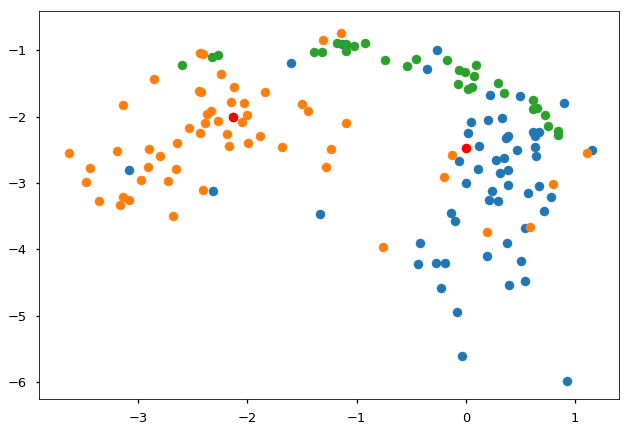

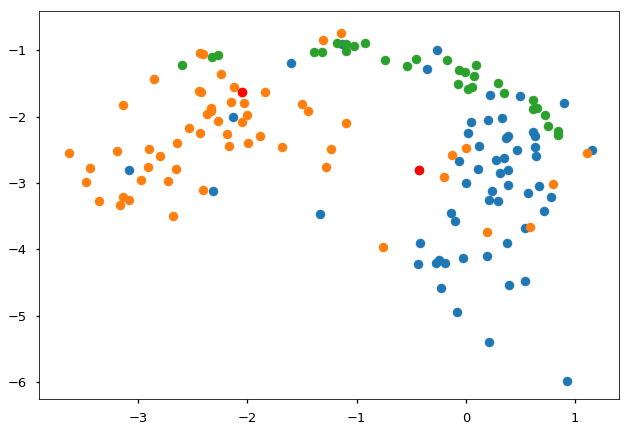

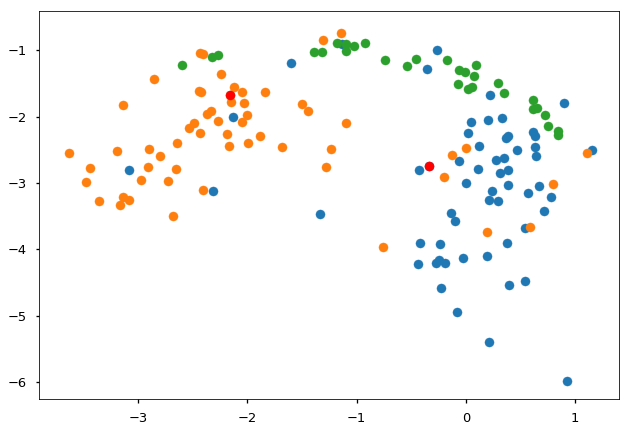

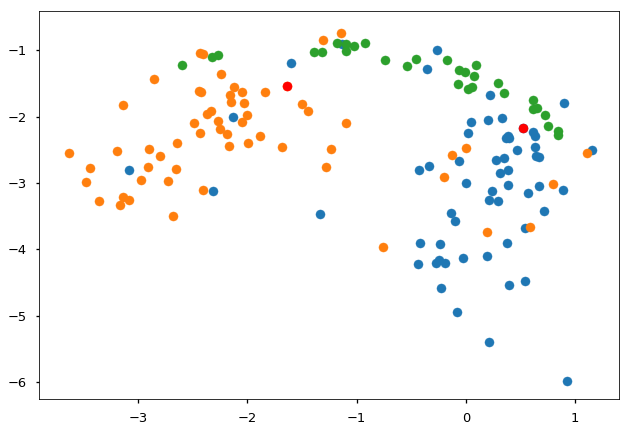

In [32]:
embeddings_new = []
for i in range(1,number_of_steps):
    graph_object = datatypes.get_graph_from_dynamics(gd_directory,i)
    
    node_embedding = MacrostatesHandlers.time_index_macro(gd_directory,
                                         "node2vec_online_macrostates",
                                         "node2vec_online",
                                         i)

    communities = graph_object.get_graph_state()["communities"]
    new_nodes = MacrostatesHandlers.time_index_macro(gd_directory,
                                                 "new_nodes",
                                                 "newnodes",
                                                 i)
    
    w_communities = {}
    for comm, values in communities.iteritems():
        w_communities[comm] = np.array([node_embedding[str(node)] for node in values])
    
    w_new = []
    for node in new_nodes['new_nodes']:
        w_new.append(node_embedding[node])
        embeddings_new.append(node_embedding[node])
        
    w_new  = np.array(w_new)
    
    for w in w_communities.values():
        try:
            plt.scatter(w[:,0], w[:,1],label="{0}".format(i))
        except:
            pass
    
    plt.scatter(w_new[:,0], w_new[:,1],label="new",color="red")
    plt.show()

In [35]:
#embeddings_new

# Keras

In [36]:
from keras.layers import Input, Dense, Embedding, LSTM
from keras.models import Model

In [53]:
#input
main_input = Input(shape=(200,100), dtype='float', name='main_input')
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)
lstm_out = LSTM(32)

In [54]:
lstm_out(main_input)

<tf.Tensor 'lstm_13/TensorArrayReadV3:0' shape=(?, 32) dtype=float32>